In [1]:
from PIL import Image
import os.path
import pandas as pd
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [10]:
def get_data():
    X=[]
    y=[]
    baseDir = os.path.abspath('..')
    filePath = os.path.join(baseDir ,'Datasets','celeba','img')
    filelist = os.listdir(filePath)
    labelPath = os.path.join(baseDir ,'Datasets','celeba','labels.csv') 
    labels = pd.read_csv(labelPath,delimiter = '\t')
    for item in filelist:
        path = os.path.join(filePath,item)
        img=Image.open(path)  
        #resize image to 64*64, conver to grayscale
        img = img.resize((64,64), Image.BILINEAR)
        img = img.convert('L')
        #flatten to 1D array and normalization
        img = np.resize(img,64*64)
        X.append(np.array(img)/255.)
        #read labels according to image name
        y.append(labels['gender'][int(item.split('.')[0])])
    y = np.array(y)
    #male = 1 and female =0
    Y = np.array((y+1)/2)
    x_train, x_test, y_train, y_test = train_test_split(X, Y,random_state=0)

    return x_train, x_test, y_train, y_test, X, Y

In [11]:
x_train, x_test, y_train, y_test, X, Y = get_data()

In [13]:
#tune solver and regularization
max_iter = np.arange(10,101)
test_acc =[]
train_acc=[]
L2_solver = ['newton-cg', 'lbfgs', 'sag']
L1_solver = ['liblinear','saga']
for _ in L1_solver:
    for reg in ['l1','l2']:
        logreg = LogisticRegression(penalty = reg, solver=_)
        logreg.fit(x_train, y_train)
        yTest_pred= logreg.predict(x_test)
        yTrain_pred = logreg.predict(x_train)
        print(_,reg,accuracy_score(y_test,yTest_pred)) 
for _ in L2_solver:
    logreg = LogisticRegression(penalty = 'l2', solver=_)
    logreg.fit(x_train, y_train)
    yTest_pred= logreg.predict(x_test)
    yTrain_pred = logreg.predict(x_train)
    print(_,reg,accuracy_score(y_test,yTest_pred)) 
#     train_acc.append(accuracy_score(y_train,yTrain_pred))

liblinear l1 0.9016
liblinear l2 0.8808


C:\Users\Public\Downloads\Anaconda\envs\AMLS\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


saga l1 0.8968


C:\Users\Public\Downloads\Anaconda\envs\AMLS\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


saga l2 0.8872
newton-cg l2 0.8832


C:\Users\Public\Downloads\Anaconda\envs\AMLS\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


lbfgs l2 0.8768
sag l2 0.8864


C:\Users\Public\Downloads\Anaconda\envs\AMLS\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [19]:
#tune regularization strength
for _ in np.linspace(-1,1,20):
    c = 10**_
    logreg = LogisticRegression(penalty = 'l1', solver='liblinear', C=c)
    logreg.fit(x_train, y_train)
    yTest_pred= logreg.predict(x_test)
    yTrain_pred = logreg.predict(x_train)
    print(c,'l1',accuracy_score(y_test,yTest_pred)) 

0.1 l2 0.8848
0.12742749857031338 l2 0.8872
0.16237767391887217 l2 0.8944
0.20691380811147897 l2 0.8968
0.26366508987303583 l2 0.9
0.33598182862837817 l2 0.9008
0.42813323987193935 l2 0.8952
0.5455594781168519 l2 0.8992
0.6951927961775606 l2 0.9
0.8858667904100825 l2 0.9032
1.1288378916846888 l2 0.896
1.438449888287663 l2 0.888
1.8329807108324356 l2 0.888
2.3357214690901213 l2 0.884
2.9763514416313175 l2 0.8816
3.79269019073225 l2 0.8816
4.832930238571752 l2 0.88
6.158482110660261 l2 0.8784
7.847599703514611 l2 0.8744
10.0 l2 0.8696


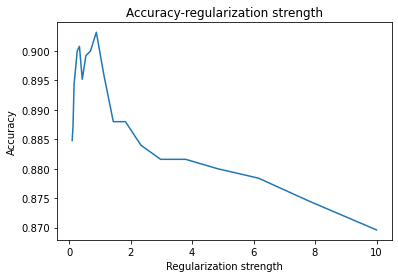

In [22]:
#visualization
acc = [0.8848,0.8872,0.8944,0.8968,0.9,0.9008,0.8952,0.8992,0.9,0.9032,0.896,0.888,0.888,0.884,0.8816,0.8816,0.88,0.8784,0.8744,0.8696]
plt.title('Accuracy-regularization strength')
plt.xlabel('Regularization strength')
plt.ylabel('Accuracy')
plt.plot(10**np.linspace(-1,1,20),acc)

In [16]:
test_temp =test_acc
train_temp=train_acc

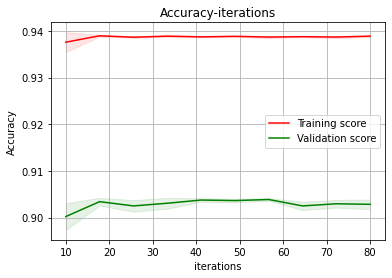

In [18]:
#learning curvve visualization
train_acc = np.array(train_temp[:80])
train_acc = np.resize(train_acc,(10,-1))
val_acc = np.array(test_temp[:80])
val_acc = np.resize(val_acc,(10,-1))
train_acc_mean = train_acc.mean(axis=1)
train_acc_std = train_acc.std(axis=1)
val_acc_mean = val_acc.mean(axis=1)
val_acc_std = val_acc.std(axis=1)
import matplotlib.pyplot as plt
plt.grid()
plt.title('Accuracy-iterations')
plt.xlabel('iterations')
plt.ylabel('Accuracy')
plt.fill_between(np.linspace(10,80,10), train_acc_mean - train_acc_std,train_acc_mean + train_acc_std, alpha=0.1,color="r")
plt.fill_between(np.linspace(10,80,10), val_acc_mean - val_acc_std,val_acc_mean + val_acc_std, alpha=0.1,color="g")
plt.plot(np.linspace(10,80,10), train_acc_mean, color="r",label="Training score")
plt.plot(np.linspace(10,80,10), val_acc_mean, color="g",label="Validation score")
plt.legend(loc="best")

In [6]:
scores = cross_val_score(logreg, X ,Y, cv=5)
print(scores)
print(scores.mean())

[0.899 0.901 0.894 0.878 0.897]
0.8938
